In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('C:/Users/Sum/Desktop/Sumin/16.프로젝트/한경_농협양곡/00.온라인데이터/2015-21온라인필터링.xlsx')
df.head()

,사업장,매출일,매출번호,정정취소구분,거래처유형,매출처명,품목명,생산년도,규격명,양곡분류구분,매출수량,환산중량,매출단가,공급금액
0,본사,2015-03-02,44,정상,온라인,(인터넷하나로클럽),웰빙혼합7곡1kg(박스형),2013,1Kg,선물세트,200,200.0,5000.0,1000000
1,본사,2015-03-02,44,정상,온라인,(인터넷하나로클럽),웰빙혼합7곡2kg(박스형),2013,2kg,선물세트,20,40.0,10000.0,200000
2,본사,2015-03-02,44,정상,온라인,(인터넷하나로클럽),웰빙혼합7곡500g(진공),2013,500g,선물세트,80,40.0,2500.0,200000
3,본사,2015-03-02,79,정상,온라인,(주)마더스,하나가득찰보리쌀10kg,2014,10Kg,PB상품,1,10.0,28800.0,28800
4,본사,2015-03-02,79,정상,온라인,(주)마더스,하나가득찰보리쌀4kg(5),2014,4kg,PB상품,2,8.0,10200.0,20400


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54229 entries, 0 to 54228
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업장     54229 non-null  object 
 1   매출일     54229 non-null  object 
 2   매출번호    54229 non-null  int64  
 3   정정취소구분  54229 non-null  object 
 4   거래처유형   54229 non-null  object 
 5   매출처명    54229 non-null  object 
 6   품목명     54229 non-null  object 
 7   생산년도    54229 non-null  int64  
 8   규격명     54229 non-null  object 
 9   양곡분류구분  54229 non-null  object 
 10  매출수량    54229 non-null  int64  
 11  환산중량    47182 non-null  float64
 12  매출단가    54229 non-null  float64
 13  공급금액    54229 non-null  int64  
dtypes: float64(2), int64(4), object(8)
memory usage: 5.8+ MB


In [5]:
# null값 확인
df.isnull().sum()

사업장          0
매출일          0
매출번호         0
정정취소구분       0
거래처유형        0
매출처명         0
품목명          0
생산년도         0
규격명          0
양곡분류구분       0
매출수량         0
환산중량      7047
매출단가         0
공급금액         0
dtype: int64

In [6]:
# 환산중량,정정취소구분,거래처유형 컬럼 제거 
del df['환산중량']
del df['정정취소구분']
del df['거래처유형']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54229 entries, 0 to 54228
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   사업장     54229 non-null  object 
 1   매출일     54229 non-null  object 
 2   매출번호    54229 non-null  int64  
 3   매출처명    54229 non-null  object 
 4   품목명     54229 non-null  object 
 5   생산년도    54229 non-null  int64  
 6   규격명     54229 non-null  object 
 7   양곡분류구분  54229 non-null  object 
 8   매출수량    54229 non-null  int64  
 9   매출단가    54229 non-null  float64
 10  공급금액    54229 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 4.6+ MB


In [7]:
# 매출일 datetime 형식으로 변환
df.매출일 = df.매출일.astype('str').astype('datetime64')

In [8]:
import datetime as dt
df['연도']  = df.매출일.dt.year
df.head()

,사업장,매출일,매출번호,매출처명,품목명,생산년도,규격명,양곡분류구분,매출수량,매출단가,공급금액,연도
0,본사,2015-03-02,44,(인터넷하나로클럽),웰빙혼합7곡1kg(박스형),2013,1Kg,선물세트,200,5000.0,1000000,2015
1,본사,2015-03-02,44,(인터넷하나로클럽),웰빙혼합7곡2kg(박스형),2013,2kg,선물세트,20,10000.0,200000,2015
2,본사,2015-03-02,44,(인터넷하나로클럽),웰빙혼합7곡500g(진공),2013,500g,선물세트,80,2500.0,200000,2015
3,본사,2015-03-02,79,(주)마더스,하나가득찰보리쌀10kg,2014,10Kg,PB상품,1,28800.0,28800,2015
4,본사,2015-03-02,79,(주)마더스,하나가득찰보리쌀4kg(5),2014,4kg,PB상품,2,10200.0,20400,2015


In [9]:
df.양곡분류구분.value_counts()

미곡      27716
PB상품    21769
선물세트     3118
잡곡       1626
Name: 양곡분류구분, dtype: int64

## 미곡 필터링

In [10]:
rice = df[df.양곡분류구분 == '미곡']
rice.head()

,사업장,매출일,매출번호,매출처명,품목명,생산년도,규격명,양곡분류구분,매출수량,매출단가,공급금액,연도
22,본사,2015-03-02,82,대외마케팅,장호원임금님표4kg/국산,2014,4kg,미곡,2,18500.0,37000,2015
23,본사,2015-03-02,82,대외마케팅,장호원임금님표10kg(지마켓),2014,10kg,미곡,4,35240.0,140960,2015
24,본사,2015-03-02,82,대외마케팅,장호원임금님표인증20kg(지마켓),2014,20kg,미곡,35,65010.0,2275350,2015
25,본사,2015-03-02,84,(주)롯데닷컴,장호원임금님표10kg(지마켓),2014,10kg,미곡,1,34700.0,34700,2015
26,본사,2015-03-02,84,(주)롯데닷컴,신김포금쌀(고시히카리)10kg,2014,10kg,미곡,2,32300.0,64600,2015


### 연도별 거래횟수가 많은 top5 매출처

In [11]:
year_list = [x for x in range(2015,2022)]
year_list

[2015, 2016, 2017, 2018, 2019, 2020, 2021]

In [12]:
for i in year_list:
    print(f'{i}년도 top5 매출처명과 거래횟수')
    print(rice[rice.연도 == i].매출처명.value_counts()[:5])
    print("_____________________")

2015년도 top5 매출처명과 거래횟수
(인터넷하나로클럽)       1286
이베이코리아 유한책임회사     994
(주)마더스            371
(주)롯데닷컴           313
대외마케팅             280
Name: 매출처명, dtype: int64
_____________________
2016년도 top5 매출처명과 거래횟수
(주)롯데닷컴          1086
이베이코리아 유한책임회사    1062
(인터넷하나로클럽)        642
(주)마더스            535
롯데상사(주)마트아이몰      342
Name: 매출처명, dtype: int64
_____________________
2017년도 top5 매출처명과 거래횟수
(인터넷하나로클럽)       990
이베이코리아 유한책임회사    935
롯데상사(주)마트아이몰     723
롯데상사(주) 온라인몰     716
(주)마더스           641
Name: 매출처명, dtype: int64
_____________________
2018년도 top5 매출처명과 거래횟수
롯데상사(주) 온라인몰     1011
이베이코리아 유한책임회사     949
(인터넷하나로클럽)        583
롯데상사(주)마트아이몰      511
(주)마더스            388
Name: 매출처명, dtype: int64
_____________________
2019년도 top5 매출처명과 거래횟수
롯데상사(주) 온라인몰     1354
롯데상사(주)마트아이몰      797
(인터넷하나로클럽)        536
(주)마더스            491
이베이코리아 유한책임회사     336
Name: 매출처명, dtype: int64
_____________________
2020년도 top5 매출처명과 거래횟수
롯데상사(주) 온라인몰    1108
(인터넷하나로클럽)       556
(주)마더스           435
쿠팡 주식회사          29

롯데에서 주로 많이 판매되고 있으며, 2020년 이후로 갈수록 쿠팡 / 네이버 등의 거래처에서 거래가 많이 일어났음을 알 수 있다. 

### 연도별 거래금액이 높은 top5 매출처

In [13]:
rice_pivot = pd.pivot_table(rice,index = '매출처명',columns='연도',values='공급금액',aggfunc='sum')

In [14]:
for i in year_list:
    print(f'{i}년도 top5 매출처명과 거래금액')
    print(rice_pivot[i].sort_values(ascending=False).head())
    print("_____________________")

2015년도 top5 매출처명과 거래금액
매출처명
(인터넷하나로클럽)       2.294724e+10
대외마케팅            2.177330e+09
이베이코리아 유한책임회사    1.561431e+09
대외홈쇼핑            9.210759e+08
(주)마더스           1.564858e+08
Name: 2015, dtype: float64
_____________________
2016년도 top5 매출처명과 거래금액
매출처명
(주)롯데닷컴          2.099582e+09
이베이코리아 유한책임회사    9.927634e+08
대외홈쇼핑            8.605737e+08
(인터넷하나로클럽)       4.659994e+08
(주)마더스           3.041640e+08
Name: 2016, dtype: float64
_____________________
2017년도 top5 매출처명과 거래금액
매출처명
롯데상사(주) 온라인몰     2.579985e+09
(인터넷하나로클럽)       1.762119e+09
(주)현대그린푸드-현대몰    1.393585e+09
(주)롯데닷컴          1.307973e+09
이베이코리아 유한책임회사    6.425835e+08
Name: 2017, dtype: float64
_____________________
2018년도 top5 매출처명과 거래금액
매출처명
롯데상사(주) 온라인몰     1.040489e+10
농협경제지주 온라인사업부    6.788410e+08
대외홈쇼핑            5.257858e+08
이베이코리아 유한책임회사    3.997558e+08
대외마케팅            3.800134e+08
Name: 2018, dtype: float64
_____________________
2019년도 top5 매출처명과 거래금액
매출처명
롯데상사(주) 온라인몰     1.198075e+10
롯데상사(주)마트아이몰     8.407583e+08
(인터넷

In [15]:
rice.품목명.value_counts()

대왕님표여주쌀(단아)10kg         678
영암믿음지기                  654
믿음지기 20kg               579
믿음지기 경주쌀 20kg           563
생거진천인증20/국산             545
                       ... 
대왕님표여주쌀(순수)20kg           1
참햇쌀보배미(정산용)               1
대왕님표 여주쌀 4kg(롯데슈퍼PB)      1
쌀(백미)/20Kg/포/국산           1
영광풍광수토골드20KG              1
Name: 품목명, Length: 583, dtype: int64

### 품목명 처리

In [16]:
# 품목명에서 영어, 숫자 제거 
# rice.품목명 = rice.품목명.str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

In [17]:
'''# 국산, 지마켓 제거
rice.품목명 = rice.품목명.str.replace('(국산','')
rice.품목명 = rice.품목명.str.replace('지마켓','')

# 마지막에 있는 공백 제거 
rice.품목명 = rice.품목명.str.strip()

# 논벼 제거
rice.품목명 = rice.품목명.str.replace('논벼','')'''

"# 국산, 지마켓 제거\nrice.품목명 = rice.품목명.str.replace('(국산','')\nrice.품목명 = rice.품목명.str.replace('지마켓','')\n\n# 마지막에 있는 공백 제거 \nrice.품목명 = rice.품목명.str.strip()\n\n# 논벼 제거\nrice.품목명 = rice.품목명.str.replace('논벼','')"

In [18]:
rice.head()

,사업장,매출일,매출번호,매출처명,품목명,생산년도,규격명,양곡분류구분,매출수량,매출단가,공급금액,연도
22,본사,2015-03-02,82,대외마케팅,장호원임금님표4kg/국산,2014,4kg,미곡,2,18500.0,37000,2015
23,본사,2015-03-02,82,대외마케팅,장호원임금님표10kg(지마켓),2014,10kg,미곡,4,35240.0,140960,2015
24,본사,2015-03-02,82,대외마케팅,장호원임금님표인증20kg(지마켓),2014,20kg,미곡,35,65010.0,2275350,2015
25,본사,2015-03-02,84,(주)롯데닷컴,장호원임금님표10kg(지마켓),2014,10kg,미곡,1,34700.0,34700,2015
26,본사,2015-03-02,84,(주)롯데닷컴,신김포금쌀(고시히카리)10kg,2014,10kg,미곡,2,32300.0,64600,2015


In [20]:
# 고유한 품목명 확인
rice.양곡분류구분.unique()

array(['미곡'], dtype=object)

### 품목별 매출수량과 공급금액 파악

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10

%matplotlib inline

In [20]:
rice_group = rice[['매출수량','공급금액']].groupby(rice['품목명']).sum()
rice_group

,매출수량,공급금액
품목명,,
(PET)무세미/2kg,50,544600
(PET)생명쌀/2kg,125,1319300
(PET)쌀눈듬뿍쌀/2kg,398,4193800
(PET)한토래쌀(혼합)현미세트/900g/국산,30,123000
-199경기미(10kg),190,6080000
...,...,...
황토배기알찬쌀20kg,4688,189344267
회현간척지쌀20kg,765,41502080
회현옥토진미골드10kg,1011,31064060


<function matplotlib.pyplot.show(*args, **kw)>

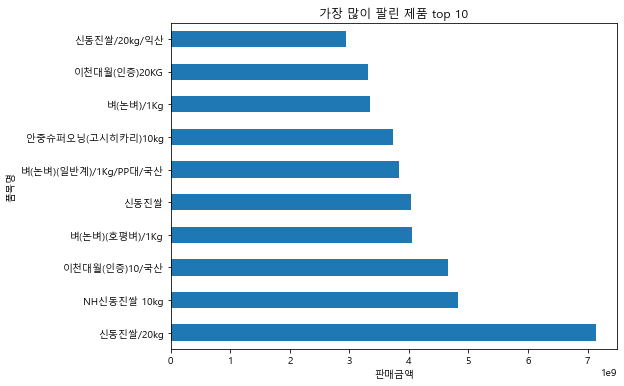

In [21]:
plt.figure(figsize=(8,6))
rice_group['공급금액'].sort_values(ascending=False).head(10).plot(kind='barh')
plt.title("가장 많이 팔린 제품 top 10")
plt.xlabel("판매금액")
plt.show

미곡의 경우, '벼'의 판매금액이 많은것을 볼 수 있으며  
신동진 쌀의 판매금액이 가장 많게 나왔다. 

### 연도별로 보기

In [22]:
by_year = rice['공급금액'].groupby(rice.연도).sum()
by_year

연도
2015    28051421147
2016     5324812958
2017     9737545617
2018    13401024811
2019    14048760771
2020    28074645887
2021    13919906384
Name: 공급금액, dtype: int64

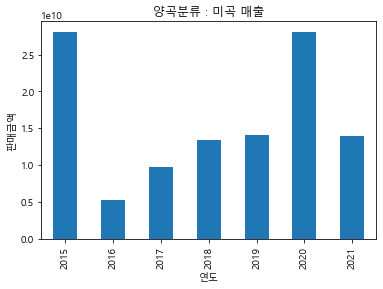

In [23]:
by_year.plot(kind='bar')
plt.title("양곡분류 : 미곡 매출")
plt.ylabel("판매금액")
plt.show()

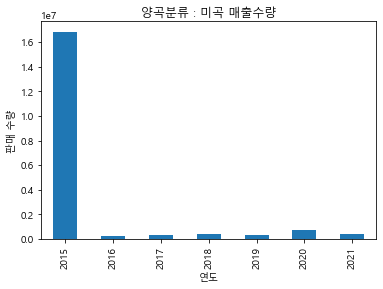

In [24]:
by_year2 = rice['매출수량'].groupby(rice.연도).sum()
by_year2.plot(kind='bar')
plt.title("양곡분류 : 미곡 매출수량")
plt.ylabel("판매 수량")
plt.show()

1. 2015년에서 2016년에 감소한 이유  
2. 2019년에서 2020년에 증가한 이유

In [25]:
rice_pivot3 = pd.pivot_table(
    data=rice,
    values=['공급금액','매출수량'],
    index='품목명',
    columns='연도',
    aggfunc='sum',
    fill_value=0
)

rice_pivot3.head()

공급금액                                              \
연도                        2015 2016    2017     2018 2019     2020    2021   
품목명                                                                          
(PET)무세미/2kg                 0    0       0        0    0   225800  318800   
(PET)생명쌀/2kg                 0    0       0        0    0  1319300       0   
(PET)쌀눈듬뿍쌀/2kg               0    0       0        0    0  3950300  243500   
(PET)한토래쌀(혼합)현미세트/900g/국산    0    0  123000        0    0        0       0   
-199경기미(10kg)                0    0       0  6080000    0        0       0   

                          매출수량                                
연도                        2015 2016 2017 2018 2019 2020 2021  
품목명                                                           
(PET)무세미/2kg                 0    0    0    0    0   22   28  
(PET)생명쌀/2kg                 0    0    0    0    0  125    0  
(PET)쌀눈듬뿍쌀/2kg               0    0    0    0    0  376   22  
(PET)한토래쌀(혼합)현미세트/900g/국산    0    0   30    0    0    0    0  
-199경기미(10kg)                0    0    0  190    0    0    0

In [26]:
rice_pivot3.columns.droplevel('연도')

Index(['공급금액', '공급금액', '공급금액', '공급금액', '공급금액', '공급금액', '공급금액', '매출수량', '매출수량',
       '매출수량', '매출수량', '매출수량', '매출수량', '매출수량'],
      dtype='object')

In [27]:
rice_pivot3.columns.droplevel(None)

Int64Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2015, 2016, 2017, 2018,
            2019, 2020, 2021],
           dtype='int64', name='연도')

In [28]:
rice_pivot3.columns = rice_pivot3.columns.droplevel('연도') + rice_pivot3.columns.droplevel(None).astype('str')
rice_pivot3.reset_index()
rice_pivot3.head()

,공급금액2015,공급금액2016,공급금액2017,공급금액2018,공급금액2019,공급금액2020,공급금액2021,매출수량2015,매출수량2016,매출수량2017,매출수량2018,매출수량2019,매출수량2020,매출수량2021
품목명,,,,,,,,,,,,,,
(PET)무세미/2kg,0,0,0,0,0,225800,318800,0,0,0,0,0,22,28
(PET)생명쌀/2kg,0,0,0,0,0,1319300,0,0,0,0,0,0,125,0
(PET)쌀눈듬뿍쌀/2kg,0,0,0,0,0,3950300,243500,0,0,0,0,0,376,22
(PET)한토래쌀(혼합)현미세트/900g/국산,0,0,123000,0,0,0,0,0,0,30,0,0,0,0
-199경기미(10kg),0,0,0,6080000,0,0,0,0,0,0,190,0,0,0


2019년 대비 2020년에 매출이 많이 증가한 제품 찾기

In [29]:
rice_pivot3['1920금액증가율'] = (rice_pivot3['공급금액2020'] - rice_pivot3['공급금액2019'])/rice_pivot3['공급금액2019'].round(4)*100
rice_pivot3['1920수량증가'] = (rice_pivot3['매출수량2020'] - rice_pivot3['매출수량2019'])

In [30]:
rice_pivot3['1920금액증가율'].replace(np.inf,0,inplace=True)
rice_pivot3['1920금액증가율'].replace(np.nan,0,inplace=True)
rice_pivot3['1920수량증가'].replace(np.inf,0,inplace=True)
rice_pivot3['1920수량증가'].replace(np.nan,0,inplace=True)

In [31]:
rice_pivot3.sort_values(by = ['1920금액증가율'], ascending = False).head()

,공급금액2015,공급금액2016,공급금액2017,공급금액2018,공급금액2019,공급금액2020,공급금액2021,매출수량2015,매출수량2016,매출수량2017,매출수량2018,매출수량2019,매출수량2020,매출수량2021,1920금액증가율,1920수량증가
품목명,,,,,,,,,,,,,,,,
대왕님표진상쌀(유통)10kg,0,0,0,0,523600,1040865726,564500,0,0,0,0,14,32191,13,198690.245607,32177
대왕님표진상쌀(유통)4kg,0,0,0,0,168300,231227276,198500,0,0,0,0,9,14681,9,137289.944147,14672
향기로전하는쌀,230000,319000,23261600,2594300,712000,750624000,0,5,7,671,62,21,14228,0,105324.719101,14207
해제황토랑10kg,5333400,623700,5125900,19183500,2371100,367407600,22507200,204,21,203,687,79,11976,610,15395.238497,11897
토요애쌀10kg,0,0,1540000,321300,178200,22895000,2688000,0,0,77,11,6,732,84,12747.923681,726


In [32]:
rice_pivot3.sort_values(by = ['1920수량증가'], ascending = False).head()

,공급금액2015,공급금액2016,공급금액2017,공급금액2018,공급금액2019,공급금액2020,공급금액2021,매출수량2015,매출수량2016,매출수량2017,매출수량2018,매출수량2019,매출수량2020,매출수량2021,1920금액증가율,1920수량증가
품목명,,,,,,,,,,,,,,,,
NH신동진쌀 10kg,0,66100000,409950000,249400000,0,2337903000,1762792000,0,4050,25200,11950,0,92496,60928,0.000000,92496
NH신동진쌀 20kg,0,0,16555000,425076008,0,2097718500,0,0,0,435,10590,0,44034,0,0.000000,44034
대왕님표진상쌀(유통)10kg,0,0,0,0,523600,1040865726,564500,0,0,0,0,14,32191,13,198690.245607,32177
신동진쌀,0,77022500,104544500,196479624,850966000,1332240480,1477466600,0,3943,5616,7846,32148,51691,49818,56.556253,19543
쌀의신동,0,0,0,49450000,195402000,1092189100,163912000,0,0,0,1060,4251,23599,2927,458.944688,19348
